### Question 9
Write a program to read the data from the following link, perform data analysis and answer the following
questions

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO


In [2]:
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'

response = requests.get(url)
data = pd.read_csv(StringIO(response.text))

print(data.head())

   VIN (1-10)    County     City State  Postal Code  Model Year    Make  \
0  5YJXCAE26J    Yakima   Yakima    WA      98908.0        2018   TESLA   
1  JHMZC5F37M    Kitsap  Poulsbo    WA      98370.0        2021   HONDA   
2  5YJ3E1EB0K      King  Seattle    WA      98199.0        2019   TESLA   
3  1N4AZ0CP5D      King  Seattle    WA      98119.0        2013  NISSAN   
4  5YJSA1E21H  Thurston    Lacey    WA      98516.0        2017   TESLA   

     Model                   Electric Vehicle Type  \
0  MODEL X          Battery Electric Vehicle (BEV)   
1  CLARITY  Plug-in Hybrid Electric Vehicle (PHEV)   
2  MODEL 3          Battery Electric Vehicle (BEV)   
3     LEAF          Battery Electric Vehicle (BEV)   
4  MODEL S          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             238   
1           Clean Alternative Fuel Vehicle Eligible              47   
2          

In [3]:
# Checking null values.
data.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [4]:
# Check datatypes of each attribute.
data.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

### 1. Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [5]:
# Filter rows where the 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' is either 'Not eligible due to low battery range' or 'Eligibility unknown as battery range has not been researched', and select only the 'Make' and 'Model' columns
cars = data[(data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Not eligible due to low battery range') | 
 (data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Eligibility unknown as battery range has not been researched')][['Make', 'Model']]

# Display the resulting DataFrame
cars


,Make,Model
6,FORD,FUSION
7,AUDI,Q5 E
8,FORD,C-MAX
11,TESLA,MODEL Y
14,FORD,C-MAX
...,...,...
130437,BMW,530E
130438,TESLA,MODEL Y
130439,NISSAN,LEAF
130440,TESLA,MODEL Y


### 2. Get all TESLA cars with the model year, and model type made in Bothell City.

In [6]:
# Filter rows where the 'Make' is 'TESLA' and the 'City' is 'Bothell', and select only the 'Model Year' and 'Model' columns
tesla = data[(data['Make'] == 'TESLA') & (data['City'] == 'Bothell')][['Model Year', 'Model']]

# Display the resulting DataFrame
tesla


,Model Year,Model
39,2020,MODEL 3
217,2022,MODEL 3
218,2022,MODEL Y
222,2018,MODEL 3
292,2017,MODEL X
...,...,...
129778,2019,MODEL 3
129954,2021,MODEL 3
129976,2014,MODEL S
130295,2022,MODEL 3


### 3. Get all the cars that have an electric range of more than 100, and were made after 2015

In [7]:
# Create a boolean mask to filter rows where the 'Electric Range' is greater than 100 and the 'Model Year' is greater than 2015
mask = (data['Electric Range'] > 100) & (data['Model Year'] > 2015)

# Use the boolean mask to filter the data and create a new DataFrame containing only the rows that meet the criteria
electric_cars = data[mask]

# Display the resulting DataFrame
electric_cars


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


### 4. Draw plots to show the distribution between city and electric vehicle type

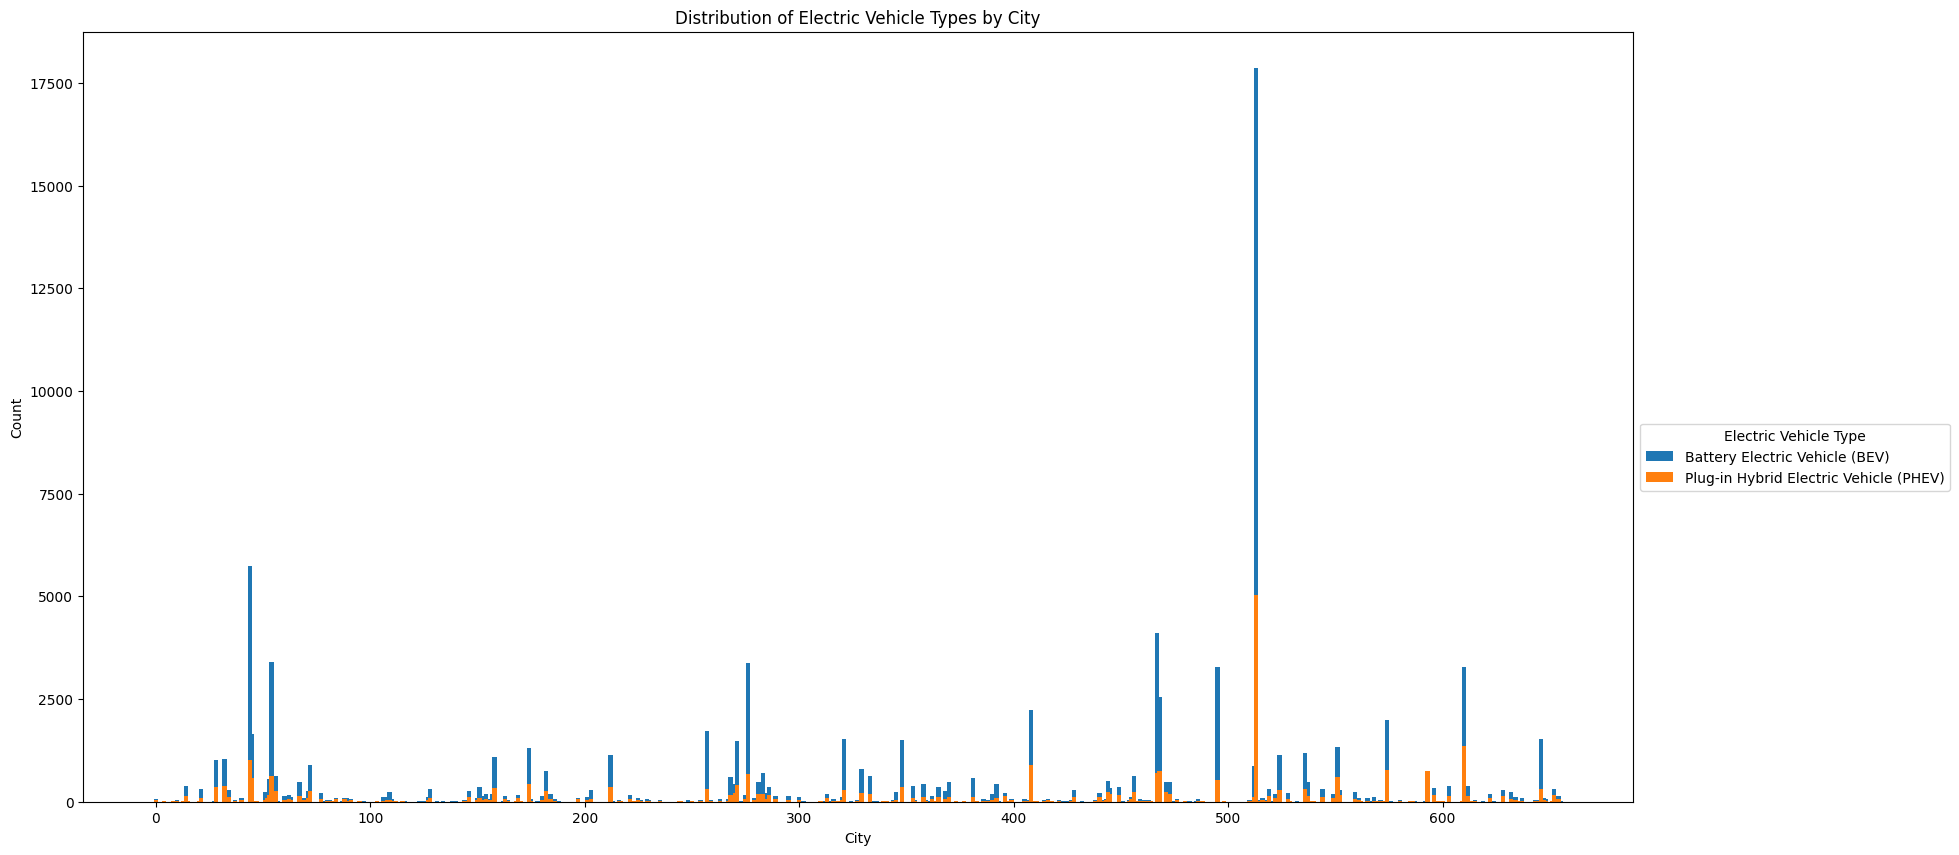

In [8]:
# Group the data by 'City' and 'Electric Vehicle Type' and count the number of occurrences of each combination
city_electric = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize = (20, 10))

# Create a range of values for the x-axis based on the number of cities in the data
x = range(len(city_electric.index))

# Loop through each electric vehicle type and plot a bar chart for each type
for i, j in enumerate(city_electric.columns):
    ax.bar(x, city_electric[j], width = 2, label = j)

# Set the x-axis label to 'City'
plt.xlabel('City')

# Set the y-axis label to 'Count'
plt.ylabel('Count')

# Set the title of the plot to 'Distribution of Electric Vehicle Types by City'
plt.title('Distribution of Electric Vehicle Types by City')

# Add a legend to the plot with the title 'Electric Vehicle Type' and position it outside the plot area
ax.legend(title = 'Electric Vehicle Type', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()
